In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
X= df.drop(columns=['Survived'])
y=df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [12]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [13]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
248,37.0,52.5542,2,37.00,37.000000,52.5542,52.5542
530,2.0,26.0000,2,2.00,2.000000,26.0000,26.0000
659,58.0,113.2750,2,58.00,58.000000,113.2750,113.2750
792,NaN,69.5500,10,28.75,29.785904,69.5500,69.5500
504,16.0,86.5000,0,16.00,16.000000,86.5000,86.5000


In [15]:
print('Original Age variable variance:', X_train['Age'].var())
print('Age Variance after median imputation:', X_train['Age_median'].var())
print('Age Variance after mean imputation:', X_train['Age_mean'].var())
print('Original Fare variable variance:', X_train ['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation:', X_train['Fare_mean'].var())

Original Age variable variance: 204.3495133904614
Age Variance after median imputation: 161.9895663346054
Age Variance after mean imputation: 161.81262452718673
Original Fare variable variance: 2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation: 2324.2385256705547


variance do shrink after mean , median imputation but do remember that shrinking should not be large

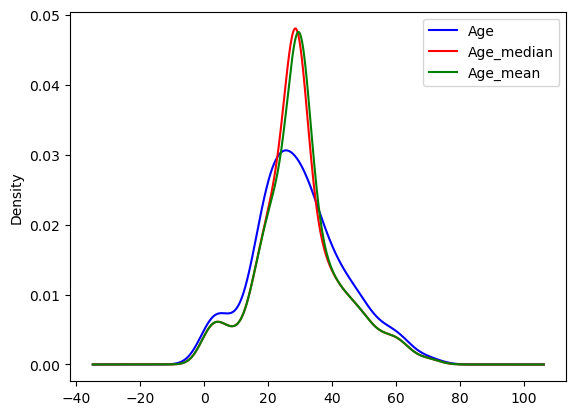

In [16]:
fig =plt.figure()
ax= fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax, color='blue')

X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

above figure is a red signal as it shows major changes in distibution after putting mean, meadian
the centre got higher due to more values at centre

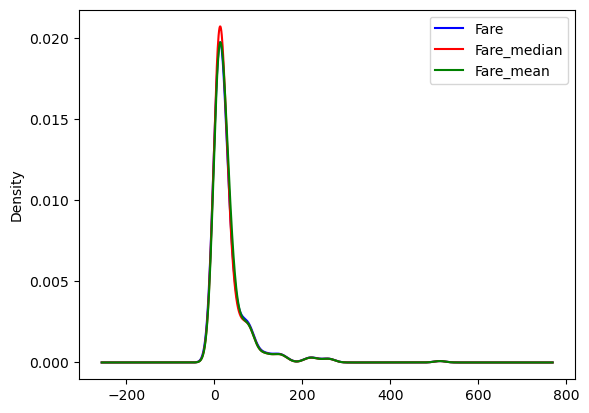

In [17]:
fig =plt.figure()
ax= fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax, color='blue')

X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_mean'].plot(kind='kde', ax=ax, color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

in above figure there is no such major change after putting mean, meadian

In [18]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [19]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

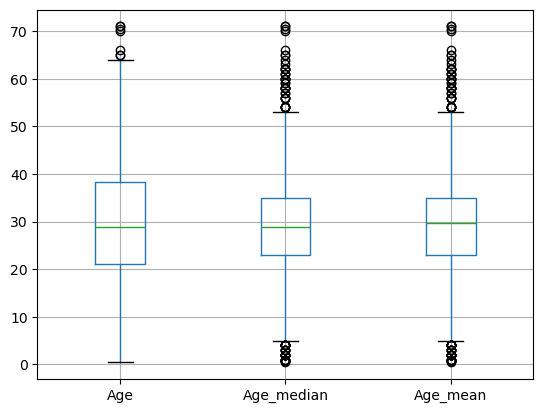

In [20]:
X_train[['Age','Age_median','Age_mean']].boxplot()

above boxplot shows new outliers got introduced whereas in below plot it is same as before

<Axes: >

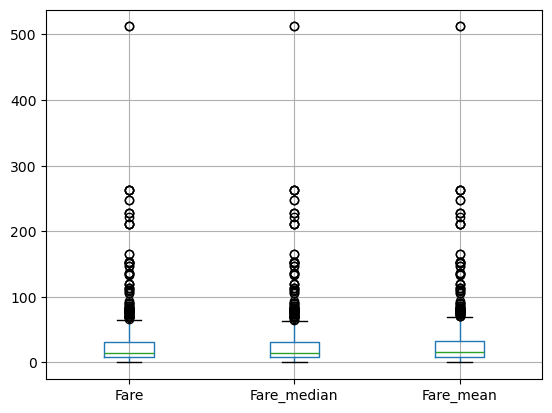

In [21]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

### Using Sklearn

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough',force_int_remainder_cols=False)

In [25]:
trf.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [28]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [29]:
X_train_df=pd.DataFrame(X_train)
X_train_df.columns=['Age','Fare','Family']
X_train_df

,Age,Fare,Family
0,40.00,27.7208,0.0
1,4.00,16.7000,2.0
2,47.00,9.0000,0.0
3,9.00,31.3875,6.0
4,20.00,9.8458,0.0
...,...,...,...
707,30.00,8.6625,0.0
708,28.75,8.7125,0.0
709,71.00,49.5042,0.0
710,28.75,221.7792,0.0
